In [1]:
import os
path = 'C:\\Users\\ai598\\Thesis\\Navigation_Learning_Engine'
os.chdir(path)
import NavigationTrajectory as nt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DataGenPrep as dgp
import json 

C:\Users\ai598\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Created navigation trajectory object


* Generate random data/points with defined boundary conditions for x coordinate
* Scale the data using min-max normalization
* For static obstacle model, separate dataset into input set (Vix,Viy,Vgx,Vgy,Ox,Oy) and Target set(M1x,M1y,M2x,M2y)
* Generate trajectory using input and target
* Filter trajectory to find good trajectory for a given threshold
* Generate specefic numbers/population of data with a given thresohld

In [2]:
dgp  = dgp.DataGenPrep()
nt = nt.NavigationTrajectory()

DataGenPrep instance created
Created navigation trajectory object


#### Define Range

In [ ]:
BcRange = {
    
    "VI"   : [18,190],
    
    "VM1"  : [300,500],
    
    "VM2"  : [501,700],
    
    "VG"   : [801,999],
    
    "OI"   : [0,999],
    
    "OM1"  : [300,500],
    
    "OM2"  : [501,700],
    
    "OG"   : [701,799]
}

# Convert and write JSON object to file
with open("DataFiles\BcRange.json", "w") as outfile: 
    json.dump(BcRange, outfile)
    
# create column array and save as text file
datacolumns = np.array(["VIX1","VIX2", "VM1X1","VM1X2","VM2X1","VM2X2","VGX1","VGX2","OIX1","OIX2","OM1X1","OM1X2","OM2X1","OM2X2","OGX1","OGX2"])
np.savetxt('DataFiles\DataFrameCol.txt', datacolumns, delimiter=" ", fmt="%s") 

In [ ]:
# open json file data as dict
with open('DataFiles\BcRange.json') as json_file:
    data = json.load(json_file)

# parse dict to numpy array
myarray = dgp.ParseDict2Num(data)
# open text file as numpy array wits stirngs of col name
datacolumns = np.loadtxt("DataFiles\DataFrameCol.txt", dtype=str) 

#### Generate Good Input/Target/plot

In [ ]:
# generate good input and target
goodinp, goodtar = dgp.RandomGoodDataGenerator(myarray,5000, Threshold= 0.6,  parts = 100,  datapoint = 10 ) 

In [ ]:
goodinp

In [ ]:
dataset = pd.DataFrame({'VIX': goodinp[:, 0], 'VIY': goodinp[:, 1],'VGX': goodinp[:, 2], 'VGY': goodinp[:, 3],'OIX': goodinp[:, 4], 'OIY': goodinp[:, 5]})
dataset.to_csv('DataFiles\goodinp_0.6.csv', index=False)  

In [ ]:
dataset_tar = pd.DataFrame({'VM1X': goodtar[:, 0], 'VM1Y': goodtar[:, 1],'VM2X': goodtar[:, 2], 'VM2Y': goodtar[:, 3]})
dataset_tar.to_csv('DataFiles\goodtar_0.6.csv', index=False) 

#### Test

In [ ]:
# test
ind= np.random.randint(0,10)
th = .2
Vmove = nt.Gen_MoveC2(goodinp,goodtar,ind,parts=6)
Opos  = goodinp[ind,[4,5]]
nt.HitCheckPlot(Opos[0],Opos[1],th,Vmove)
count = nt.StaticCheckBad(Vmove,Opos,th)
print("count:",count)
print("index:",ind)

#### Data Visualization

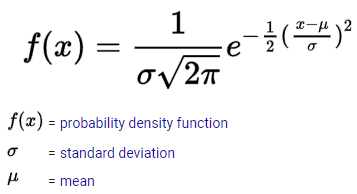

In [ ]:
# Genrates random data
RandomData = dgp.Data_Array(myarray,100)
# scale random data with min-max
sc_data = dgp.Scale_Data(RandomData) 
# Gaussian Distribution plot of all 16 data features
dgp.GaussDistPlot(sc_data,datacolumns)

### Modified Dataset

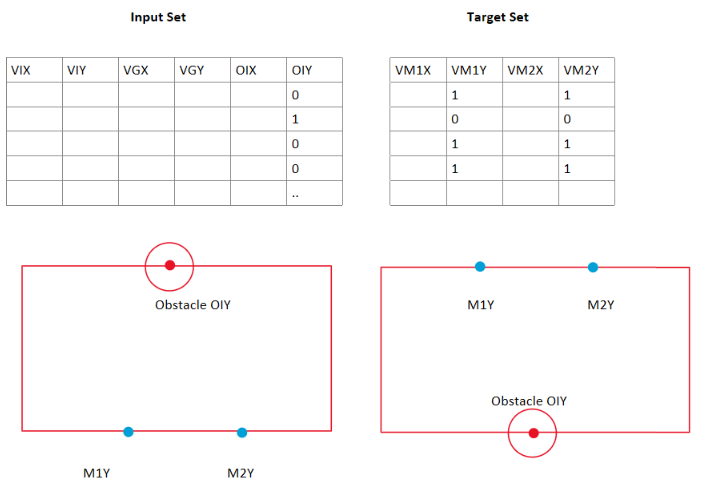

**Modify Current Dataset**:

> import current 0.6 threshold dataset

> Change input column $OIY$ Value
>> If $X_{i}\geq0.5 \ then \ X_{i} = 1$

>> Else $X_{i} = 0$

>> $X_{i} \in \ OIY$

> Change target column $VM1Y$ and $VM2Y$ Value
>> Let $X_{i} \in \ OIY$

>> $Y_{i} \in \ VM1Y$

>> $Z_{i} \in \ VM2Y$

>> If $X_{i} = 0$ then $Y_{i} = 1$ and $Z_{i} = 1$

>> Else $Y_{i} = 0$ and $Z_{i} = 0$

    



In [3]:
def ReplaceOIYByCond(x):
    if(x >= 0.5):
        return 1
    else:
        return 0
def ReplaceVMYByCond(x):
    if(x==0):
        return 1
    else:
        return 0
    
def ReplaceVMYByCond2(x):
    if(x>=0.5):
        return np.random.uniform(0,0.50)
    else:
        return np.random.uniform(0.55,1)

def ReplaceOIYByCol(df):
    i = 0
    maxlen = len(df['OIY'])
    while(i<maxlen):
        df['OIY'].iloc[i] = ReplaceOIYByCond(df['OIY'].iloc[i])
        i=i+1
    return df

def ReplaceVMYByCol(df1,df2):
    """
    Input:
        
        df1: Input dataset
        df2: target dataset
    
    Return:
            
        Target Dataset of repalced values 
        
    """
    
    i = 0
    maxlen = len(df1['OIY'])
    
    while(i<maxlen):
        df2['VM1Y'].iloc[i] = ReplaceVMYByCond2(df1['OIY'].iloc[i])
        df2['VM2Y'].iloc[i] = ReplaceVMYByCond2(df1['OIY'].iloc[i])
        i = i+1
        
    return df2         
    
    

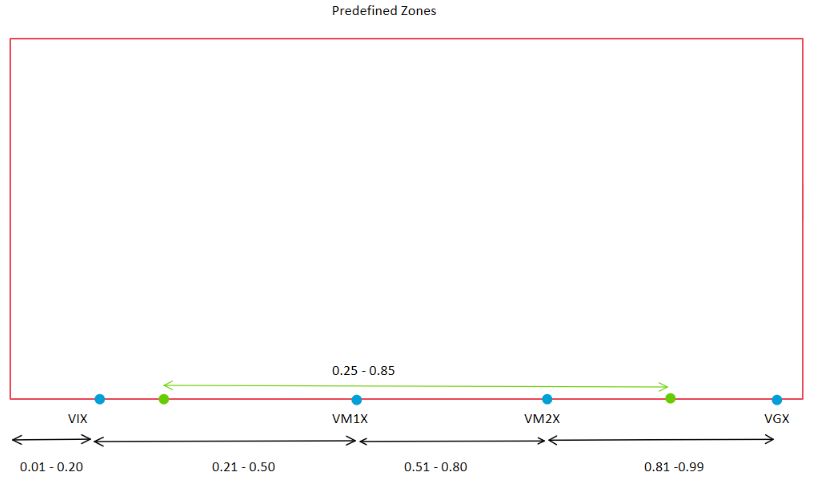

In [54]:
maxit = 10000
VIX = np.random.uniform(.01,.20,maxit)
VM1X = np.random.uniform(.21,.50,maxit)
VM2X = np.random.uniform(.51,.80,maxit)
VGX = np.random.uniform(.81,.99,maxit)
OIX = np.random.uniform(.25,.85,maxit)

VIY = np.random.uniform(.01,.99,maxit)
VM1Y = np.random.uniform(.01,.99,maxit)
VM2Y = np.random.uniform(.01,.99,maxit)
VGY = np.random.uniform(.01,.99,maxit)
OIY = np.random.uniform(.01,.99,maxit)

In [55]:
df1 = pd.DataFrame({'VIX': VIX, 'VIY': VIY,  'VGX': VGX, 'VGY': VGY ,'OIX': OIX, 'OIY': OIY})
#ReplaceOIYByCol(df1)
df2= pd.DataFrame({'VM1X': VM1X, 'VM1Y': VM1Y,'VM2X': VM2X, 'VM2Y': VM2Y})
ReplaceVMYByCol(df1,df2)

,VM1X,VM1Y,VM2X,VM2Y
0,0.327765,0.990046,0.512616,0.869945
1,0.489130,0.715127,0.631856,0.730317
2,0.280111,0.278460,0.620405,0.062085
3,0.388253,0.657225,0.584089,0.567499
4,0.352624,0.600020,0.514005,0.813311
...,...,...,...,...
9995,0.264557,0.654612,0.767192,0.833291
9996,0.399197,0.679226,0.671999,0.963088
9997,0.379002,0.303266,0.727194,0.292766
9998,0.315393,0.972312,0.676101,0.812061


### Filter

In [21]:
def FilterOutBadMove(df_inp,df_tar,th = 0.3):
    """
        Filter out bad input and target (hit) within a given threshold and return clean dataframe
        
        input 1 : dataframe object. input dataframe.
        input 2 : dataframe object. target dataframe.
        input 3 : obstacle threshold. optional (0.3 by default) 
                
        return 1: dataframe object. good input dataframe.
        return 2: dataframe object. goo target dataframe.
    """
    Arr_input = np.asarray(df_inp)
    Arr_target = np.asarray(df_tar)
    
    good_inp = []
    good_tar = []
    for x in range (0, len(Arr_input)):
        
        Vmove = nt.Gen_MoveC2(Arr_input,Arr_target,x,parts=50)
        Opos  = Arr_input[x,[4,5]]
        
        count = nt.StaticCheckBad(Vmove,Opos,th) # count is bad count. 1 for bad and 0 for good
        
        if(count==0):
            good_inp.append(Arr_input[x])
            good_tar.append(Arr_target[x])
        
    Arr_inp = np.array(good_inp)
    Arr_tar = np.array(good_tar)  
        
    df1 = pd.DataFrame({'VIX': Arr_inp[:,0], 'VIY': Arr_inp[:,1],  'VGX': Arr_inp[:,2], 'VGY': Arr_inp[:,3] ,'OIX': Arr_inp[:,4], 'OIY': Arr_inp[:,5]})

    df2= pd.DataFrame({'VM1X': Arr_tar[:,0], 'VM1Y': Arr_tar[:,1],'VM2X': Arr_tar[:,2], 'VM2Y': Arr_tar[:,3]})
        
    return df1,df2   
    

In [56]:
df1,df2 = FilterOutBadMove(df1,df2,th = 0.3)

df1.to_csv('DataFiles/TestData_inp.csv', index=False)
df2.to_csv('DataFiles/TestData_tar.csv', index=False)

### Test Data

In [52]:
df_good_inp = pd.read_csv('DataFiles/new_inp.csv')  # import data
df_good_target = pd.read_csv('DataFiles/new_tar.csv')  # import data

In [53]:
df_good_inp

,VIX,VIY,VGX,VGY,OIX,OIY
0,0.057743,0.196207,0.869882,0.387223,0.585589,0.789823
1,0.194982,0.571793,0.926592,0.026629,0.351272,0.918768
2,0.042573,0.489061,0.975975,0.362659,0.703204,0.937709
3,0.031594,0.569446,0.964099,0.521561,0.301930,0.028893
4,0.060159,0.348169,0.911143,0.165828,0.515013,0.360811
...,...,...,...,...,...,...
5205,0.171423,0.214609,0.870144,0.864661,0.320877,0.686637
5206,0.050189,0.518511,0.938791,0.419680,0.281008,0.232940
5207,0.034152,0.435118,0.950606,0.573245,0.710231,0.125834
5208,0.091019,0.521082,0.887516,0.691639,0.651372,0.227077


In [27]:
df_good_target.head()

,VM1X,VM1Y,VM2X,VM2Y
0,0.306001,0.001659,0.731614,0.335677
1,0.262706,0.056420,0.560415,0.418048
2,0.381519,0.640429,0.531481,0.711164
3,0.356666,0.652555,0.749022,0.807718
4,0.325398,0.318932,0.625528,0.272835


In [28]:
goodinp = np.asarray(df_good_inp) 
goodtar = np.asarray(df_good_target)

count: 0
index: 69


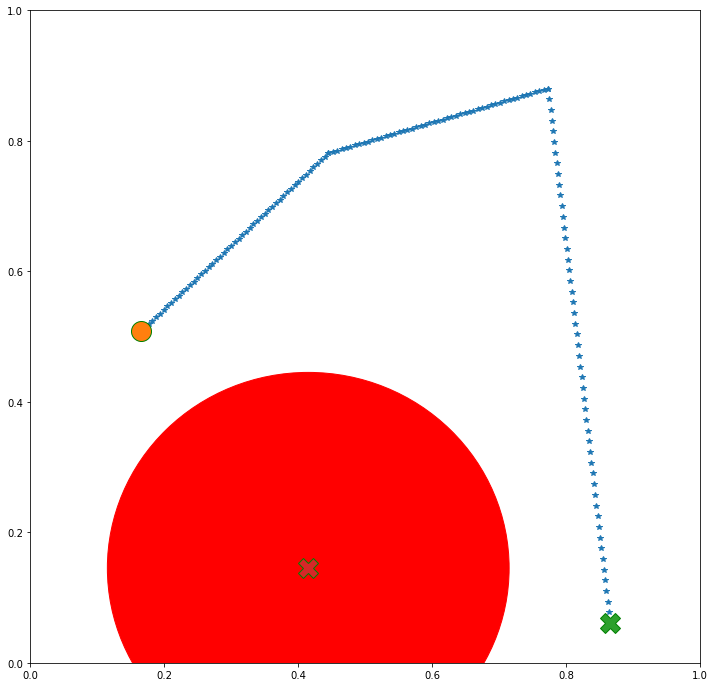

In [48]:
# test
ind= np.random.randint(0,100)
th = .3
Vmove = nt.Gen_MoveC2(goodinp,goodtar,ind,parts=50)
Opos  = goodinp[ind,[4,5]]
nt.HitCheckPlot(Opos[0],Opos[1],th,Vmove) # O is starting, X is goal
count = nt.StaticCheckBad(Vmove,Opos,th)
print("count:",count)
print("index:",ind)